In [ ]:
pip install scipy numpy cliffs-delta pandas-ods-reader matplotlib

In [1]:
from IPython.display import Markdown, display
from cliffs_delta import cliffs_delta
from scipy.stats import tukey_hsd
from pandas_ods_reader import read_ods

import collections
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import mannwhitneyu

In [3]:
path = "RawData.ods"

# Reading data from Group A - With IA during lab session
sheet_name = "Group_A"
df_group_a = read_ods(path, sheet_name)

# Reading data from Group B -  No IA during lab session
sheet_name = "Group_B"
df_group_b = read_ods(path, sheet_name)

sheet_name = "General"
df_general = read_ods(path, sheet_name)

In [4]:
#Participant Statistics
age_mean = df_general['Age'].mean()
age_mean = round(age_mean, 2)
# age semester - 13
semenster_mean = df_general['Semester'].mean()
semenster_mean = round(semenster_mean, 2)
# age semester - 13
dropout = 4
# age gender - 12
quant_male = (df_general['Gender'] == 'Male').sum()
quant_female = (df_general['Gender'] == 'Female').sum()
participants = quant_male+quant_female
gender_prop_male = quant_male/participants
gender_prop_male = round(gender_prop_male, 2)  
gender_prop_female = quant_female/participants
gender_prop_female = round(gender_prop_female, 2) 

# 4.1 Participant Background

We collected:
* Age
* Semester
* Gender

In [5]:
# Table 1
table_md = f"""
| Participants   | Age Mean   | Semester Mean    | Male         | Male Proportion    | Female         | Female Proportion    | Dropout    |
|----------------|------------|------------------|--------------|--------------------|----------------|----------------------|------------|
| {participants} | {age_mean} | {semenster_mean} | {quant_male} | {gender_prop_male} | {quant_female} | {gender_prop_female} | {dropout} |
"""

display(Markdown(table_md))


| Participants   | Age Mean   | Semester Mean    | Male         | Male Proportion    | Female         | Female Proportion    | Dropout    |
|----------------|------------|------------------|--------------|--------------------|----------------|----------------------|------------|
| 42 | 22.21 | 3.45 | 36 | 0.86 | 6 | 0.14 | 4 |


We collected:
* If they know GIA
* How often the use GIA
* How often they use GIA for programming activities

We also collected:
* know IA
* How frenquent they use is
* How frequent in programing.

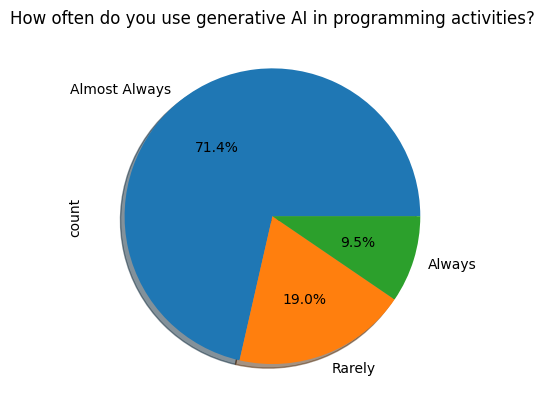

In [6]:
counts = df_general['Programming'].value_counts(dropna=False)
counts.plot.pie(autopct='%1.1f%%', shadow=True)
plt.title('How often do you use generative AI in programming activities?')
plt.show()

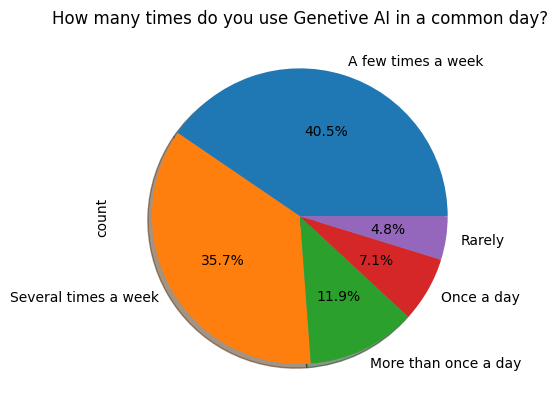

In [7]:
counts = df_general['ai_day-by-day'].value_counts(dropna=False)
counts.plot.pie(autopct='%1.1f%%', shadow=True)
plt.title('How many times do you use Genetive AI in a common day?')
plt.show()

# Difference between groups

We calculate if there is diffence between the groups with pre-test.

In [19]:
n_group_a = df_group_a['score_pre'].count()
mean_group_a = round(df_group_a['score_pre'].mean(), 3)
var_group_a = round(df_group_a['score_pre'].var(), 3)
exame1_group_a = df_group_a['score_pre']

n_group_b = df_group_b['score_pre'].count()
mean_group_b = round(df_group_b['score_pre'].mean(), 3)
var_group_b = round(df_group_b['score_pre'].var(), 3)
exame1_group_b = df_group_b['score_pre']

U, p = mannwhitneyu(exame1_group_a, exame1_group_b, method="exact")
d, res = cliffs_delta(exame1_group_a, exame1_group_b)

U = int(U)
p = round(p, 5)
d = round(d, 5)

In [20]:
# Table 1
table_md = f"""
| Groups   | N           | Mean           | Variance      | U Statistics | p-value | Cliffs-delta | Cliffs-d result |
|----------|-------------|----------------|---------------|--------------|---------|--------------|-----------------|
| Group A  | {n_group_a} | {mean_group_a} | {var_group_a} | {U}          | {p}     | {d}          |{res}            |
| Group B  | {n_group_b} | {mean_group_b} | {var_group_b} | -            | -       | -            | -               |
"""

display(Markdown(table_md))


| Groups   | N           | Mean           | Variance      | U Statistics | p-value | Cliffs-delta | Cliffs-d result |
|----------|-------------|----------------|---------------|--------------|---------|--------------|-----------------|
| Group A  | 24 | 4.864 | 0.76 | 216          | 1.0     | 0.0          |negligible            |
| Group B  | 18 | 5.035 | 1.942 | -            | -       | -            | -               |


There is no difference or any result Cliffs-delta.

# ChatGPT and No-Chat GPT

We calculate if there is diffence between the groups with pos-test

In [21]:
n_group_a = df_group_a['score_pos'].count()
mean_group_a = round(df_group_a['score_pos'].mean(), 3)
var_group_a = round(df_group_a['score_pos'].var(), 3)
exame2_group_a = df_group_a['score_pos']

n_group_b = df_group_b['score_pos'].count()
mean_group_b = round(df_group_b['score_pos'].mean(), 3)
var_group_b = round(df_group_b['score_pos'].var(), 3)
exame2_group_b = df_group_b['score_pos']

U, p = mannwhitneyu(exame2_group_a, exame2_group_b, method="exact")
d, res = cliffs_delta(exame2_group_a, exame2_group_b)

U = int(U)
p = round(p, 5)
d = round(d, 5)

In [22]:
# Table 1
table_md = f"""
| Groups   | N           | Mean           | Variance      | U Statistics | p-value | Cliffs-delta | Cliffs-d result |
|----------|-------------|----------------|---------------|--------------|---------|--------------|-----------------|
| Group A  | {n_group_a} | {mean_group_a} | {var_group_a} | {U}          | {p}     | {d}          |{res}            |
| Group B  | {n_group_b} | {mean_group_b} | {var_group_b} | -            | -       | -            | -               |
"""

display(Markdown(table_md))


| Groups   | N           | Mean           | Variance      | U Statistics | p-value | Cliffs-delta | Cliffs-d result |
|----------|-------------|----------------|---------------|--------------|---------|--------------|-----------------|
| Group A  | 24 | 4.94 | 1.335 | 203          | 0.77249     | -0.05787          |negligible            |
| Group B  | 18 | 4.894 | 1.782 | -            | -       | -            | -               |


We can see the effect but there is no difference using or not the IA.

# Group B - pre and pos-test comparison

We calculate if there is diffence between regarding group B pre and post-test

In [28]:
n_group_b1 = df_group_b['score_pre'].count()
mean_group_b1 = round(df_group_b['score_pre'].mean(), 3)
var_group_b1 = round(df_group_b['score_pre'].var(), 3)
exame1_group_b = df_group_b['score_pre']

n_group_b2 = df_group_b['score_pos'].count()
mean_group_b2 = round(df_group_b['score_pos'].mean(), 3)
var_group_b2 = round(df_group_b['score_pos'].var(), 3)
exame2_group_b = df_group_b['score_pos']

U, p = mannwhitneyu(exame1_group_b, exame2_group_b, method="exact")
d, res = cliffs_delta(exame1_group_b, exame2_group_b)

U = int(U)
p = round(p, 5)
d = round(d, 5)

In [34]:
# Table 1
table_md = f"""
| Groups       | N            | Mean            | Variance       | U Statistics | p-value | Cliffs-delta | Cliffs-d result |
|--------------|--------------|-----------------|----------------|--------------|---------|--------------|-----------------|
| Group B-pre  | {n_group_b1} | {mean_group_b1} | {var_group_b1} | {U}          | {p}     | {d}          |{res}            |
| Group B-pos  | {n_group_b2} | {mean_group_b2} | {var_group_b2} | -            | -       | -            | -               |
"""

display(Markdown(table_md))


| Groups       | N            | Mean            | Variance       | U Statistics | p-value | Cliffs-delta | Cliffs-d result |
|--------------|--------------|-----------------|----------------|--------------|---------|--------------|-----------------|
| Group B-pre  | 18 | 5.035 | 1.942 | 148          | 0.696     | -0.08333          |negligible            |
| Group B-pos  | 18 | 4.894 | 1.782 | -            | -       | -            | -               |


We can see the effect but there is no difference using or not the IA.

# Group A - pre and pos-test comparison

We calculate if there is diffence between regarding group B pre and post-test

In [35]:
n_group_a1 = df_group_a['score_pre'].count()
mean_group_a1 = round(df_group_a['score_pre'].mean(), 3)
var_group_a1 = round(df_group_a['score_pre'].var(), 3)
exame1_group_a = df_group_a['score_pre']

n_group_a2 = df_group_a['score_pos'].count()
mean_group_a2 = round(df_group_a['score_pos'].mean(), 3)
var_group_a2 = round(df_group_a['score_pos'].var(), 3)
exame2_group_a = df_group_a['score_pos']

U, p = mannwhitneyu(exame1_group_a, exame2_group_a, method="exact")
d, res = cliffs_delta(exame1_group_a, exame2_group_a)

U = int(U)
p = round(p, 5)
d = round(d, 5)

In [36]:
# Table 1
table_md = f"""
| Groups       | N            | Mean            | Variance       | U Statistics | p-value | Cliffs-delta | Cliffs-d result |
|--------------|--------------|-----------------|----------------|--------------|---------|--------------|-----------------|
| Group A-pre  | {n_group_a1} | {mean_group_a1} | {var_group_a1} | {U}          | {p}     | {d}          |{res}            |
| Group A-pos  | {n_group_a2} | {mean_group_a2} | {var_group_a2} | -            | -       | -            | -               |
"""

display(Markdown(table_md))


| Groups       | N            | Mean            | Variance       | U Statistics | p-value | Cliffs-delta | Cliffs-d result |
|--------------|--------------|-----------------|----------------|--------------|---------|--------------|-----------------|
| Group A-pre  | 24 | 4.864 | 0.76 | 244          | 0.3731     | -0.15278          |small            |
| Group A-pos  | 24 | 4.94 | 1.335 | -            | -       | -            | -               |


# Group A and B - MOSS exam

We calculate if there is diffence between regarding group B pre and post-test

In [39]:
column_exame_2 = 6

n_group_a = np.count_nonzero(df_group_a[:, column_exame_2])
mean_group_a = round(np.mean(df_group_a[:, column_exame_2]), 3)
max_group_a = np.max(df_group_a[:, column_exame_2])
min_group_a = np.min(df_group_a[:, column_exame_2])
var_group_a = round(np.var(df_group_a[:, column_exame_2]), 3)
exame2_group_a = df_group_a[:, column_exame_2].tolist()

n_group_b = np.count_nonzero(df_group_b[:, column_exame_2])
max_group_b = np.max(df_group_b[:, column_exame_2])
min_group_b = np.min(df_group_b[:, column_exame_2])
mean_group_b = round(np.mean(df_group_b[:, column_exame_2]), 3)
var_group_b = round(np.var(df_group_b[:, column_exame_2]), 3)
exame2_group_b = df_group_b[:, column_exame_2].tolist()

U, p = mannwhitneyu(exame2_group_a, exame2_group_b, method="exact")
d, res = cliffs_delta(exame2_group_a, exame2_group_b)

U = int(U)
p = round(p, 5)
d = round(d, 5)

In [40]:
# Table 1
table_md = f"""
| Groups       | N           | Min           | Max           | Mean           | Variance      | U Statistics | p-value | Cliffs-delta | Cliffs-d result |
|--------------|-------------|---------------|---------------|----------------|---------------|--------------|---------|--------------|-----------------|
| Group A      | {n_group_a} | {min_group_a} | {max_group_a} | {mean_group_a} | {var_group_a} | {U}          | {p}     | {d}          |{res}            |
| Group B      | {n_group_b} | {min_group_b} | {max_group_b} | {mean_group_b} | {var_group_b} | -            | -       | -            | -               |
"""

display(Markdown(table_md))


| Groups       | N           | Min           | Max           | Mean           | Variance      | U Statistics | p-value | Cliffs-delta | Cliffs-d result |
|--------------|-------------|---------------|---------------|----------------|---------------|--------------|---------|--------------|-----------------|
| Group A      | 11 | 64.07 | 81.56 | 71.691 | 23.775 | 40          | 0.04423     | -0.48052          |large            |
| Group B      | 14 | 65.57 | 100.0 | 81.179 | 126.616 | -            | -       | -            | -               |
